In [1]:
#importando bibliotecas

import numpy as np  #biblioteca para manipulação de arrays numéricos
import pandas as pd #biblioteca para manipulação e análise de dados em formato tabular.
import matplotlib.pyplot as plt #iblioteca para criação de gráficos e visualizações.
import seaborn as sns #biblioteca de visualização estatística baseada no matplotlib.

from sklearn.preprocessing import StandardScaler #classe para normalização dos dados.
from sklearn.model_selection import train_test_split #função para dividir os dados em conjuntos de treino e teste.
from sklearn.metrics import accuracy_score #função para calcular a acurácia do modelo.
from sklearn.neural_network import MLPClassifier #classe para criação de uma rede neural MLP para classificação.
from sklearn.metrics import classification_report #função para gerar um relatório de classificação.
from sklearn.metrics import confusion_matrix #função para criar a matriz de confusão.

In [3]:
#carregando o conjunto de dados "dermatology.csv" usando o pandas 
#e exibindo as 5 primeiras linhas.
dermatology = pd.read_csv('dermatology.csv')
dermatology.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [4]:
#pré-processamento dos dados

#tratando os dados pois existe o caracter "?" no banco, mas a biblioteca não o reconhece
dermatology.replace('?', np.nan, inplace=True) #substituição do caractere "?" por valores nulos
dermatology_data = dermatology.astype(float) #convertendo os dados para o tipo float
dermatology_data.fillna(dermatology_data.mean(), inplace=True) #preenchimento dos valores ausentes com a média dos respectivos atributos

In [5]:
#separação dos recursos de entrada (x) e da variável de destino (y)
x = dermatology_data.drop('class', axis=1)  #recursos de entrada
y = dermatology_data['class'] #variável de destino

In [6]:
#normalizando os dados de entrada usando a classe StandardScaler
scaler = StandardScaler()   
x_norm = scaler.fit_transform(x) 

In [7]:
#dividindo os dados em conjuntos de treino e teste usando a função train_test_split
x_training, x_test, y_training, y_test = train_test_split(x_norm, y, test_size=0.3, random_state=42) 


In [8]:
#criando a rede neural MLP usando a classe MLPClassifier
mlp = MLPClassifier (hidden_layer_sizes=(10,5), # duas camadas escondidas com 10 e 5 neurônios, respectivamente
                    max_iter=2000,              #número máximo de épocas de treinamento
                    tol=0.0001,                 #tolerância para determinar a convergência do treinamento
                    learning_rate_init=0.1,     #taxa de aprendizado
                    solver="sgd",               #estratégia de otimização - gradiente descendente 
                    activation="relu",          #funcao de ativacao ReLU
                    learning_rate="constant",   #taxa de aprendizado constante
                    verbose=2,                  #exibe informações detalhadas durante o treinamento
                    )

#treinando a rede neural MLP com os dados de treino
mlp.fit(x_training, y_training)

Iteration 1, loss = 2.23252946
Iteration 2, loss = 1.72618000
Iteration 3, loss = 1.32052894
Iteration 4, loss = 1.01540644
Iteration 5, loss = 0.87363580
Iteration 6, loss = 0.77500416
Iteration 7, loss = 0.68489069
Iteration 8, loss = 0.59885668
Iteration 9, loss = 0.51730801
Iteration 10, loss = 0.44066646
Iteration 11, loss = 0.37441703
Iteration 12, loss = 0.31185507
Iteration 13, loss = 0.25707174
Iteration 14, loss = 0.20483499
Iteration 15, loss = 0.17258973
Iteration 16, loss = 0.13780215
Iteration 17, loss = 0.11637906
Iteration 18, loss = 0.10136163
Iteration 19, loss = 0.09137052
Iteration 20, loss = 0.08238224
Iteration 21, loss = 0.07495564
Iteration 22, loss = 0.06862685
Iteration 23, loss = 0.06336294
Iteration 24, loss = 0.05879969
Iteration 25, loss = 0.05502422
Iteration 26, loss = 0.05114218
Iteration 27, loss = 0.04845825
Iteration 28, loss = 0.04555493
Iteration 29, loss = 0.04263602
Iteration 30, loss = 0.04025597
Iteration 31, loss = 0.03832132
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(10, 5), learning_rate_init=0.1, max_iter=2000,
              solver='sgd', verbose=2)

In [9]:
#previsão das classes para os dados de teste usando a rede neural treinada

#previsoes da rede neural no conjunto de teste
y_pred_mlp = mlp.predict(x_test) #passa o conjunto de teste para a rede neural prever

#calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred_mlp)
print("Acurácia MLP: ", accuracy) #mostra  acurácia


Acurácia MLP:  0.9727272727272728


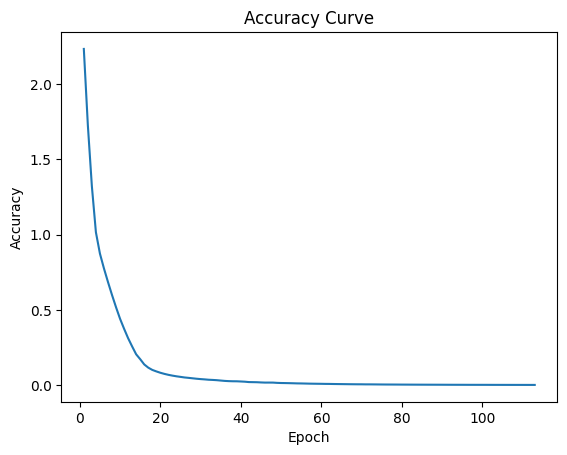

In [10]:
#cálculo da acurácia do modelo comparando as previsões com as classes reais
#extrai as acurácias de cada época
accuracies = mlp.loss_curve_

#plota o gráfico de acurácia ao longo das épocas de treinamento
plt.plot(range(1, len(accuracies) + 1), accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.show()


In [11]:
#previsão da classe para um novo dado
#prevendo para um novo dado
new = np.array([[2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
new_norm = scaler.transform(new)

#verificando o número de recursos nos dados de treinamento
num_features = x.shape[1]

#certificando de que os novos dados tenham o mesmo número de recursos
if new.shape[1] != num_features:
    raise ValueError(f"Os novos dados devem ter {num_features} características, mas tem {new.shape[1]} características.")

#normalizando os novos dados
new_data_norm = scaler.transform(new)

#previsão usando a Mlp de classificação
new_prediction = mlp.predict(new_data_norm)
print("Previsão MLP: ", new_prediction)

Previsão MLP:  [5.]


C:\Users\letic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\letic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


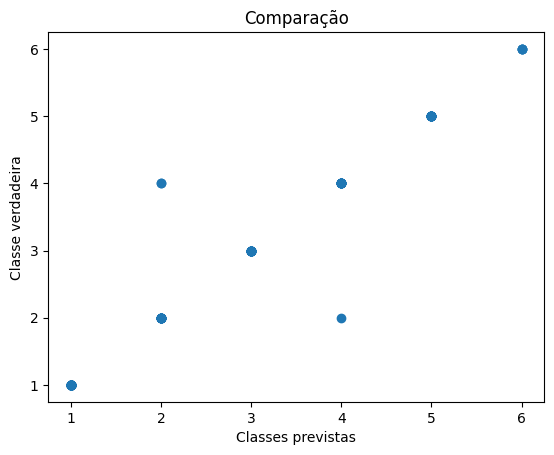

In [13]:
#plotagem de um gráfico de dispersão para comparar as classes previstas com as classes reais
plt.scatter(y_pred_mlp, y_test)
plt.xlabel('Classes previstas')
plt.ylabel('Classe verdadeira')
plt.title('Comparação')
plt.show()

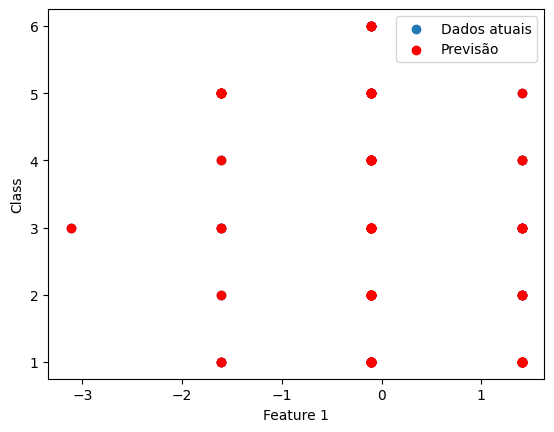

In [14]:
#plotagem de gráficos para visualizar a relação entre o recurso 1 e as classes reais e previstas
x_teste_desnorm = scaler.inverse_transform(x_test)
plt.scatter(x_test[:, 0], y_test, label="Dados atuais")
plt.scatter(x_test[:, 0], y_pred_mlp, color="red", label="Previsão")
plt.xlabel('Feature 1')
plt.ylabel('Class')
plt.legend(loc=1)
plt.show()

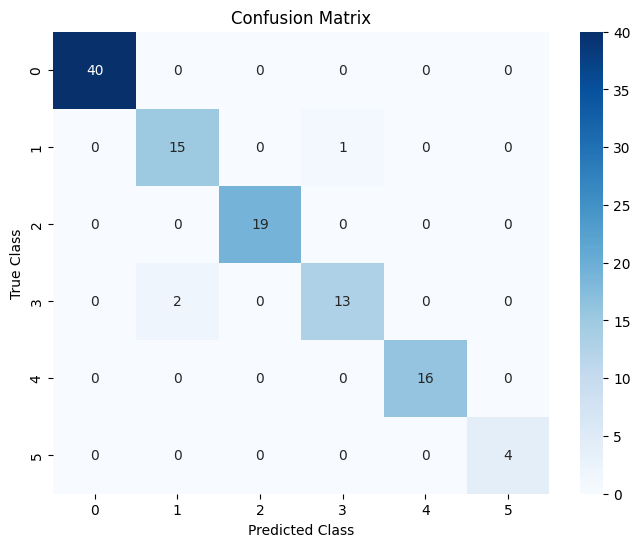

In [16]:
#calcula a matriz de confusão usando a função confusion_matrix
confusion = confusion_matrix(y_test, y_pred_mlp)

# Plota a matriz de confusão usando um mapa de calor (heatmap) para visualização mais clara
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap="Blues")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()


In [17]:
#geração de um relatório de classificação contendo métricas de avaliação do modelo para cada classe
report = classification_report(y_test, y_pred_mlp)
print(report)

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        40
         2.0       0.88      0.94      0.91        16
         3.0       1.00      1.00      1.00        19
         4.0       0.93      0.87      0.90        15
         5.0       1.00      1.00      1.00        16
         6.0       1.00      1.00      1.00         4

    accuracy                           0.97       110
   macro avg       0.97      0.97      0.97       110
weighted avg       0.97      0.97      0.97       110

